# Example use of pandas_ta
* Simple imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas_ta as ta
from alphaVantageAPI.alphavantage import AlphaVantage  # pip install alphaVantage-api
e = pd.DataFrame()

### Help on Indicators (post an [issue](https://github.com/twopirllc/pandas-ta/issues) if the indicator doc needs updating)

In [2]:
e.ta.indicators()
help(ta.accbands)

pandas.ta - Technical Analysis Indicators
Total Indicators: 72
Abbreviations:
    accbands, ad, adosc, adx, ao, apo, aroon, atr, bbands, bop, cci, cmf, cmo, coppock, decreasing, dema, donchian, dpo, efi, ema, eom, fwma, hl2, hlc3, hma, ichimoku, increasing, kc, kst, kurtosis, linreg, log_return, macd, mad, massi, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, percent_return, ppo, pvol, pvt, pwma, quantile, rma, roc, rsi, skew, sma, stdev, stoch, t3, tema, trima, trix, true_range, tsi, uo, variance, vortex, vp, vwap, vwma, willr, wma, zscore
Help on function accbands in module pandas_ta.volatility:

accbands(high, low, close, length=None, c=None, drift=None, mamode=None, offset=None, **kwargs)
    Acceleration Bands (ACCBANDS)
    
    Acceleration Bands created by Price Headley plots upper and lower envelope
    bands around a simple moving average.
    
    Sources:
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/acceleration-band

### Load Daily EUR.USD from [AlphaVantage](http://www.alphavantage.com) and clean it up a little

In [4]:
AV = AlphaVantage(premium=False, clean=True, output_size='full')
df = AV.fx(from_currency='USD', to_currency='EUR', function='FXD') # Daily
# df['0'] = 0
df.ta.constants(True, -4, 4)
print(f"Shape: {df.shape}")
df.set_index(['date'], inplace=True)
df.head()

Shape: (100, 14)


,open,high,low,close,-4,-3,-2,-1,0,1,2,3,4
date,,,,,,,,,,,,,
2018-12-05,1.1340,1.1361,1.1310,1.1347,-4,-3,-2,-1,0,1,2,3,4
2018-12-06,1.1348,1.1413,1.1320,1.1377,-4,-3,-2,-1,0,1,2,3,4
2018-12-07,1.1377,1.1424,1.1359,1.1389,-4,-3,-2,-1,0,1,2,3,4
2018-12-09,1.1395,1.1402,1.1380,1.1398,-4,-3,-2,-1,0,1,2,3,4
2018-12-10,1.1398,1.1443,1.1348,1.1350,-4,-3,-2,-1,0,1,2,3,4


### Price Chart with Moving Averages

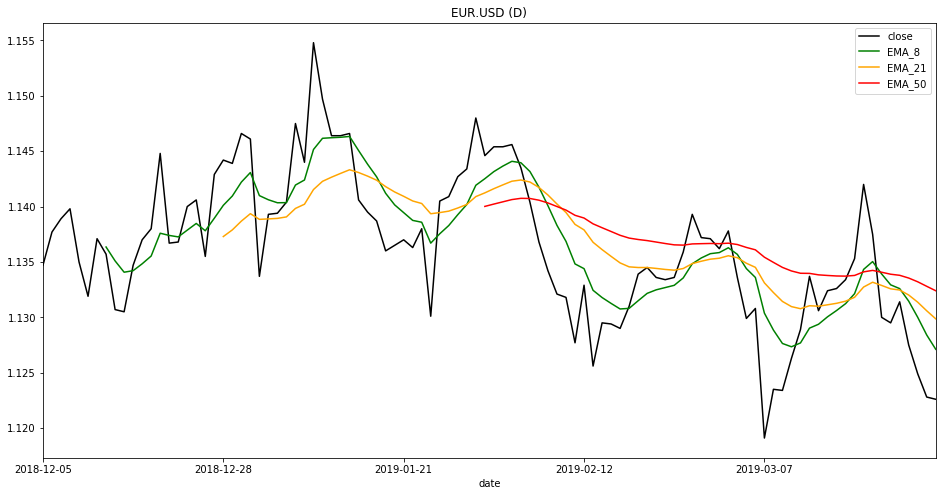

In [5]:
df.ta.ema(length=8, append=True)
df.ta.ema(length=21, append=True)
df.ta.ema(length=50, append=True)
df[['close', 'EMA_8', 'EMA_21', 'EMA_50']].plot(figsize=(16,8), color=['black', 'green', 'orange', 'red'], title="EUR.USD (D)")

## Indicator Samples

### Cumulative Log Return

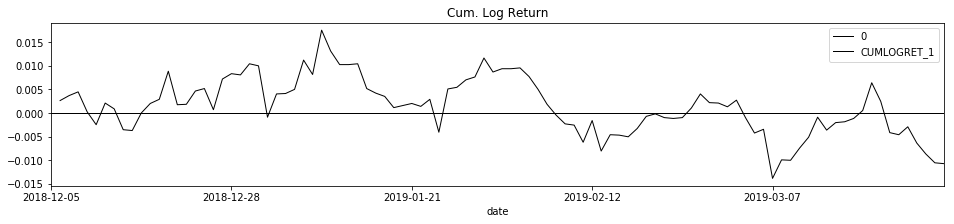

In [6]:
df.ta.log_return(cumulative=True, append=True)
df[['0', 'CUMLOGRET_1']].plot(figsize=(16, 3), color=['black'], linewidth=1, title="Cum. Log Return")

### Absolute Price Oscillator (APO)

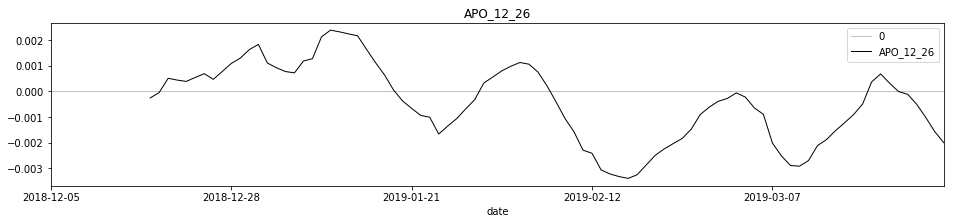

In [7]:
df.ta.apo(append=True)
apo_12_26 = df[['0', 'APO_12_26']]
apo_12_26.plot(figsize=(16, 3), color=['silver', 'black'], linewidth=1, title='APO_12_26')

### MACD

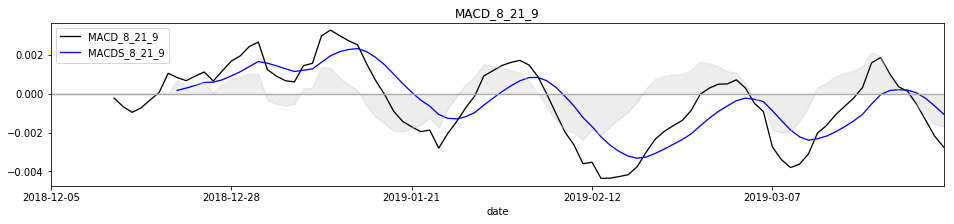

In [8]:
macddf = df.ta.macd(fast=8, slow=21, signal=9, min_periods=None, append=True)
macddf[[macddf.columns[0], macddf.columns[2]]].plot(figsize=(16, 3), color=['black', 'blue'], linewidth=1.3)
macddf[macddf.columns[1]].plot.area(figsize=(16, 3), stacked=False, color=['#dddddd'], linewidth=1, title=macddf.name)
df['0'].plot(figsize=(16, 3), color=['#aaaaaa'], linewidth=1.4)

### ZScore

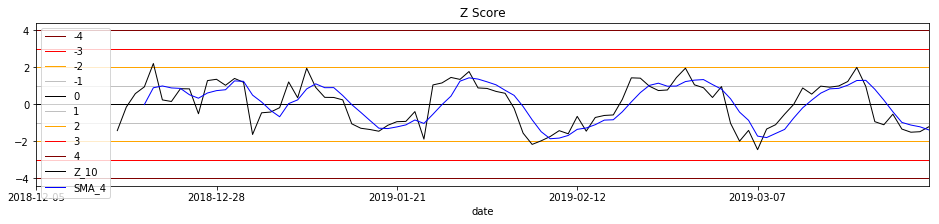

In [9]:
df.ta.zscore(length=10, append=True)
df.ta.sma(df[df.columns[-1]], length=4, append=True)
zcolors = ['maroon', 'red', 'orange', 'silver', 'black', 'silver', 'orange', 'red', 'maroon', 'black', 'blue']
df[['-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', 'Z_10', 'SMA_4']].plot(figsize=(16, 3), color=zcolors, linewidth=1, title="Z Score")